# Question 2

## Importing Modules

In [122]:
from sklearn import *
import pickle
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.utils import shuffle
from torchsummary import summary
from tqdm import tqdm as tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from numpy import exp as exp
import warnings
warnings.filterwarnings("ignore")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params)

### Part a. Pre Processing

In [203]:
df = pd.read_excel('/content/Dry_Bean_Dataset.xlsx')

In [204]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [205]:
df['Class'] = preprocessing.LabelEncoder().fit_transform(df['Class'])

In [206]:
ScaledData = preprocessing.StandardScaler().fit_transform(df[df.columns[0:16]])

In [207]:
df[df.columns[0:16]] = ScaledData

In [208]:
def boxplots(df, rows, columns):
    fig, axes  =plt.subplots(rows,columns ,figsize = (20,20))
    for i in range(rows):
        for j in range(columns):
            sns.boxplot(x = df.columns[rows*i + j], ax=axes[i,j], data = df)

In [ ]:
sns.pairplot(df, hue = 'Class')

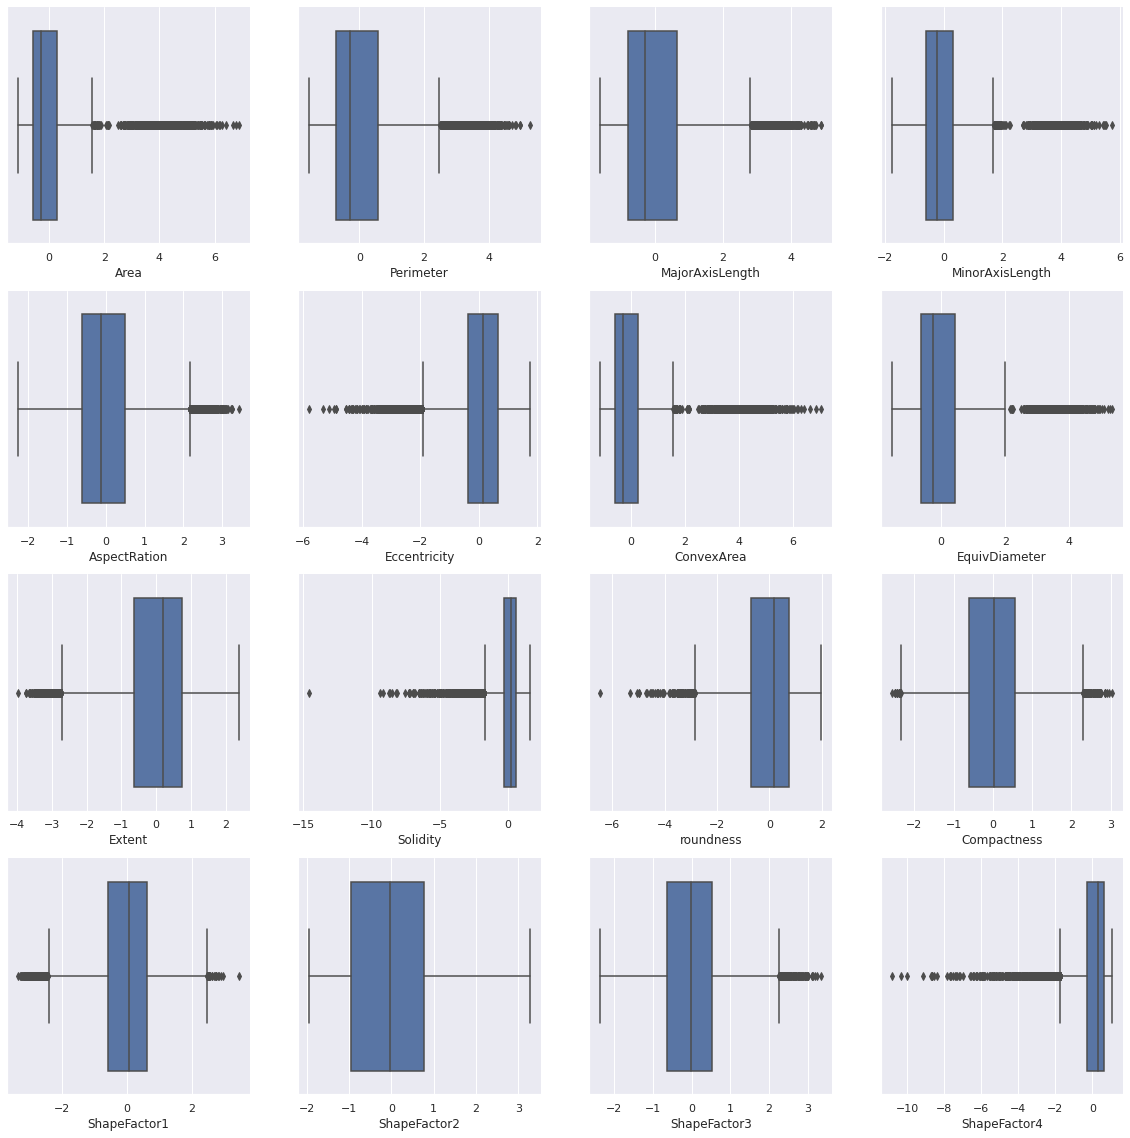

In [129]:
boxplots(df , 4 , 4)

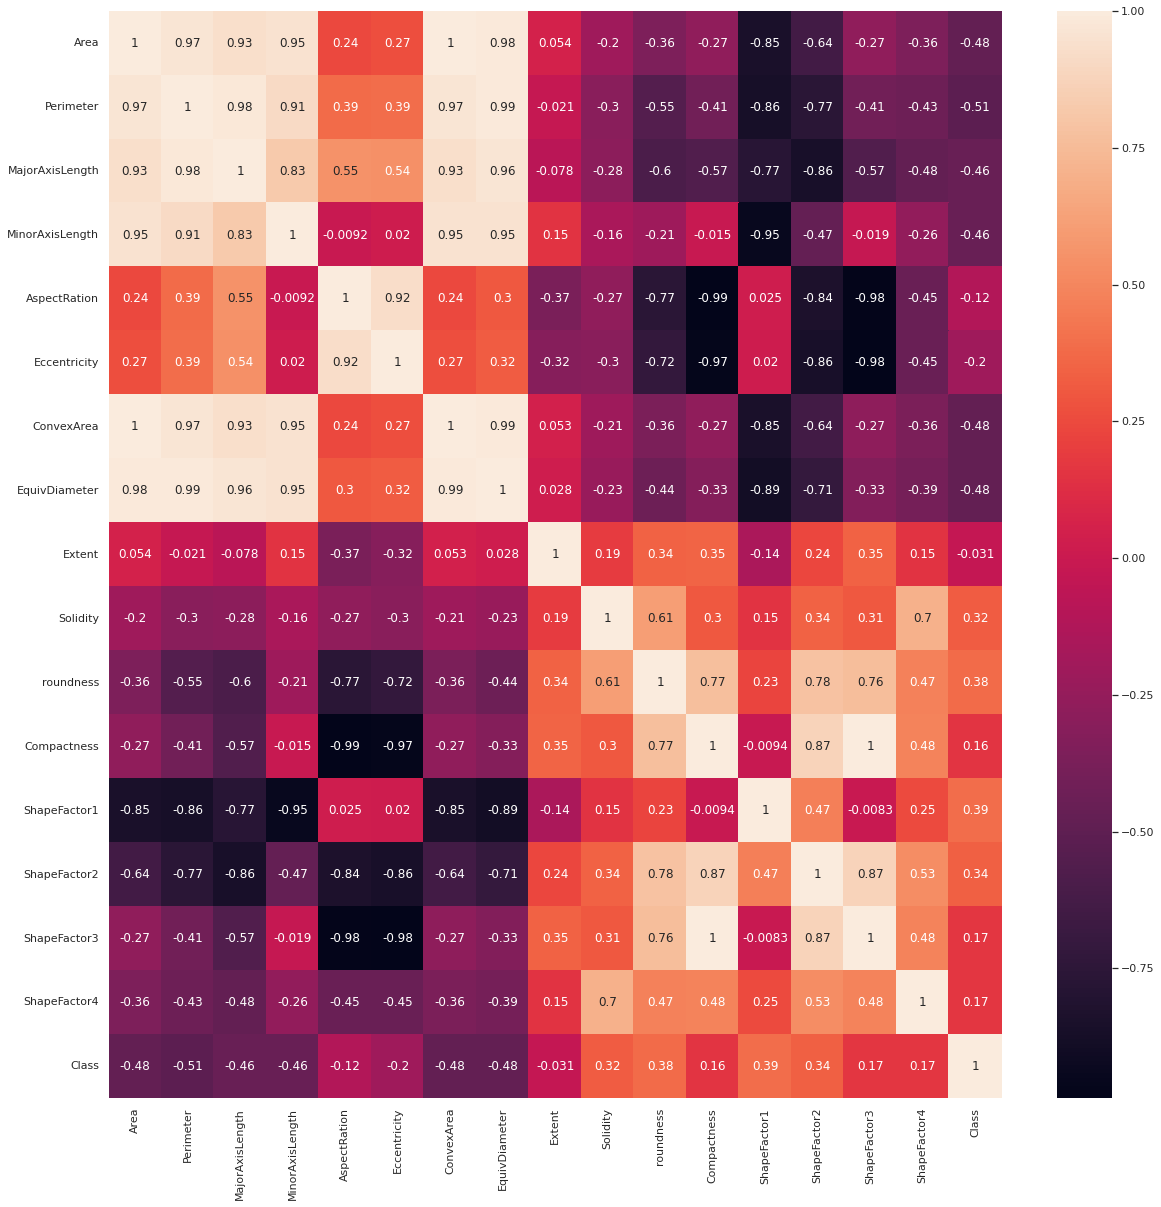

In [130]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)

In [131]:
'''
Removing Outliers
'''

print('Number of Outliers')
print('Roundness    --> ',len(df[df['roundness'] < -3]))
print('ShapeFactor1 --> ',len(df[df['ShapeFactor1'] > 2.1]) + len(df[df['ShapeFactor1'] < -2.1]))
print('Area         --> ',len(df[df['Area'] > 1.9]))
print('ConvexArea   --> ',len(df[df['ConvexArea'] > 1.9]))
print('Perimeter    --> ',len(df[df['Perimeter'] > 1.9]))
print('Solidity     --> ',len(df[df['Solidity'] < -2.2]))
print('ShapeFactor4 --> ',len(df[df['ShapeFactor4'] < -1.85]))

Number of Outliers
Roundness    -->  74
ShapeFactor1 -->  635
Area         -->  526
ConvexArea   -->  526
Perimeter    -->  545
Solidity     -->  491
ShapeFactor4 -->  681


In [132]:
rows = np.where(df['roundness'] < -3)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['ShapeFactor1'] > 2.1)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['ShapeFactor1'] < -2.1)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['Area'] > 1.9)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['ConvexArea'] > 1.9)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['Perimeter'] > 1.9)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['Solidity'] < -2.2)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)
rows = np.where(df['ShapeFactor4'] < -1.85)
for i in rows:
    df.drop(i,inplace = True)
df.reset_index(drop = True, inplace = True)

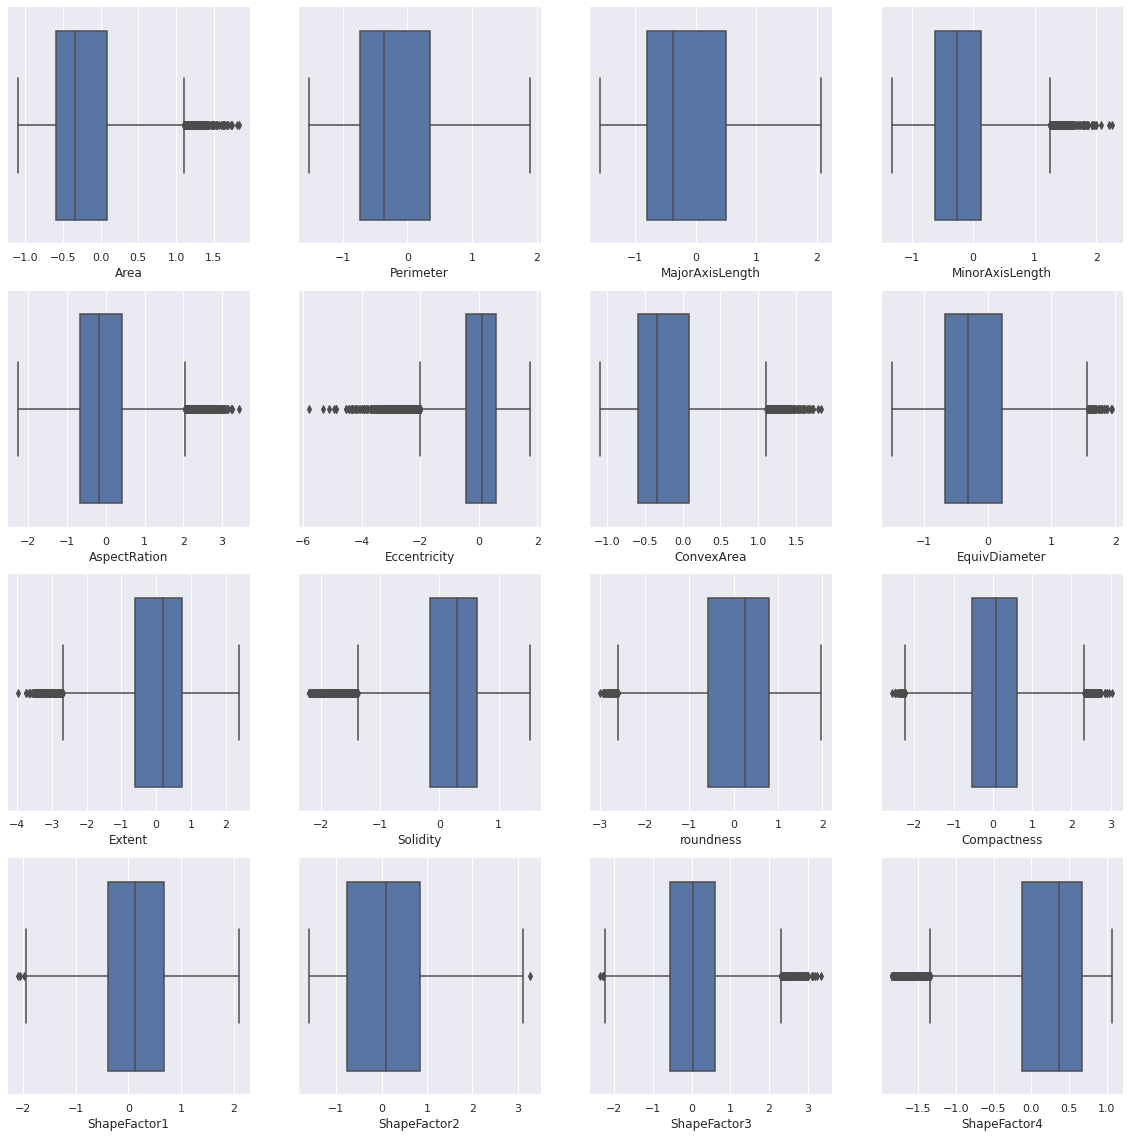

In [133]:
boxplots(df , 4 , 4)

In [134]:
X = np.array(df.iloc[: , :-1])
y = np.array(df.iloc[: , -1])
from sklearn.model_selection import StratifiedShuffleSplit as sss
ss = sss(n_splits = 1,test_size = 0.3, random_state=12)
for train_index, test_index in ss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Part b

In [135]:
class neuralNetworks:
    '''
    Q2. Part b. i.
    Activation Functions
    1. Sigmoid
    2. Softmax
    3. Tanh
    4. Softmax (for last layer) 
    '''
    def sigmoid(self,x,deri=False):
        if deri:
            return self.sigmoid(x) * (1 - self.sigmoid(x))
        return exp(x) / (1 + exp(x))
    def softmax(self,x):
        sum_ = 0
        for i in x[0]:
            sum_ += exp(i)
        for i in range(len(x[0])):
            x[0][i] = exp(x[0][i]) / sum_
        return x
    def ReLU(self,x, deri = False):
        if deri:
            return x > 0
        if x > 0:
            return x
        else:
            return 0 
    def tanh(self,x,deri = False):
        if deri:
            return 1 - tanh(x)**2
        return (exp(x) - exp(-x)) / (exp(x)+exp(-x))
    def __init__(self,weigh, learningRate = 0.0001):
        self.learningRate = learningRate
        self.weightType = weigh
        self.activations = {'sigmoid':self.sigmoid, 'softmax':self.softmax ,'ReLU':self.ReLU,'tanh':self.tanh}
        self.model = {}
        self.layerCount = -1
        self.weights = {}
        self.bias = {}
        self.Xvals = {}
        self.activatedXvals = {}
        self.activationLayers = {}
        self.errors = {}
    def add(self, n = 32):
        self.layerCount += 1
        self.model[self.layerCount] = n
        i = self.layerCount
        if i > 0:
            if self.weightType == 'random':
                self.weights[i-1] = np.random.normal(0,0.09,(self.model[i-1],self.model[i]) )
            elif self.weightType == 'zeros':
                self.weights[i-1] = np.zeros((self.model[i-1],self.model[i] ))
            elif self.weightType == 'constant':
                self.weights[i-1] = np.ones((self.model[i-1],self.model[i] ))
            self.bias[i] = np.zeros((1 , self.model[i]))
        self.Xvals[i] = np.zeros((1,n))
    def addAct(self,activation):
        self.activationLayers[self.layerCount] = activation
    def compile(self,activation = 'softmax'):
        self.activationLayers[self.layerCount] = activation
        
    '''
    Q2. Part b. ii.
    Forward propagating the input
    '''
    def feedForward(self,X):
        self.Xvals[0] = X
        self.activatedXvals[0] = self.Xvals[0]
        for i in range(0 , self.layerCount):
            self.Xvals[i+1] = np.dot(self.activatedXvals[i],self.weights[i]) + self.bias[i+1]
            act = self.activations[self.activationLayers[i+1]]
            if self.activationLayers[i+1] == 'softmax':
                self.activatedXvals[i+1] = act(self.Xvals[i+1])
            else:
                self.activatedXvals[i+1] =np.array([act(j) for j in self.Xvals[i+1][0]]).reshape(1 , self.Xvals[i+1].shape[1])
    '''
    Q2. Part b. iii.
    Backward propagating the error
    '''
    def backPropagate(self, X,y):
        lc = self.layerCount
        dfinal = self.activatedXvals[lc] - y
        self.errors[lc] = [self.activatedXvals[lc-1].T.dot(dfinal), dfinal]
        for i in range(lc-1 , 0 , -1):
            act = self.activations[self.activationLayers[i]]
            dfinal = dfinal.dot(self.weights[i].T) * np.array([act(j) for j in self.Xvals[i][0]]).reshape(1 , self.Xvals[i].shape[1])
            self.errors[i] = [self.activatedXvals[i-1].T.dot(dfinal), dfinal]
    def update(self,X,y):
        self.feedForward(X)
        self.backPropagate(X,y)
    '''
    Q2. Part b. iv.
    '''
    def train(self,X,Y,iterations):
        print('Progress ---')
        for i in tqdm(range(len(Y))):
            x = X[i]
            y = Y[i]
            self.update(x,y)
            for j in range(iterations):
                for ix in range(len(self.weights)):
                    self.weights[ix] = self.weights[ix] - self.learningRate * self.errors[ix+1][0]
                    self.bias[ix+1] = self.bias[ix+1] - self.learningRate * self.errors[ix+1][1]   
    '''
    Q2. Part b. v.
    Predicting Test sample and calculating accuracy down below
    '''
    def predict(self,X):
        temp = []
        for x in X:
            self.feedForward(x)
            temp.append(np.argmax(self.activatedXvals[self.layerCount]))
        return np.array(temp)
    def save_weights(self,filename = 'my_filename.pickle'):
      with open(filename, 'wb') as file:
        pickle.dump(self.weights, file, protocol=pickle.HIGHEST_PROTOCOL)
    def load_weights(self,filename):
      infile = open(filename,'rb')
      self.weights = pickle.load(infile)
      infile.close()

### Part c

In [136]:
X_train = X_train.reshape(X_train.shape[0], 1 , 16)
max_ = max(y_train)
ytrain = []
for i in y_train:
    temp = [0 for j in range(max_+1)]
    temp[i] = 1
    ytrain.append(temp)
ytrain = np.array(ytrain).reshape(len(y_train),1,max_+1)

In [137]:
## Sigmoid Activation
model1 = neuralNetworks('random')
model1.add(16)
model1.add(32)
model1.addAct('sigmoid')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred1 = model1.predict(X_test)

Progress ---


100%|██████████| 8512/8512 [00:46<00:00, 181.48it/s]


In [138]:
accSigmoid = metrics.accuracy_score(y_test, ypred1)

In [139]:
## ReLU Activation
model1 = neuralNetworks('random',0.00003)
model1.add(16)
model1.add(32)
model1.addAct('ReLU')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred1 = model1.predict(X_test)

Progress ---


100%|██████████| 8512/8512 [00:45<00:00, 189.04it/s]


In [140]:
accReLU = metrics.accuracy_score(y_test, ypred1)

In [141]:
## tanh Activation
model1 = neuralNetworks('random', 0.00003)
model1.add(16)
model1.add(32)
model1.addAct('tanh')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred1 = model1.predict(X_test)

Progress ---


100%|██████████| 8512/8512 [00:47<00:00, 177.91it/s]


In [142]:
accTanh = metrics.accuracy_score(y_test, ypred1)

In [143]:
print('Accuracy (Sigmoid) ===>',accSigmoid)
print('Accuracy (ReLU) ===>',accReLU)
print('Accuracy (tanh) ===>',accTanh)

Accuracy (Sigmoid) ===> 0.8867872807017544
Accuracy (ReLU) ===> 0.918859649122807
Accuracy (tanh) ===> 0.8980263157894737


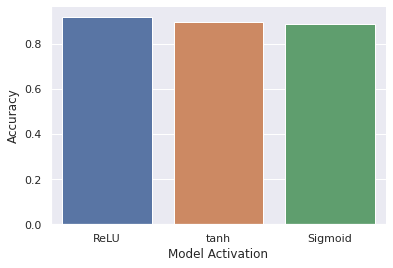

In [144]:
df_ = pd.DataFrame()
df_['Model Activation'] = ['ReLU','tanh','Sigmoid']
df_['Accuracy'] = [accReLU, accTanh, accSigmoid]
sns.barplot(x = 'Model Activation', y = 'Accuracy', data = df_)

### Part d

In [145]:
## Random
model1 = neuralNetworks('random',0.00003)
model1.add(16)
model1.add(32)
model1.addAct('ReLU')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypredRandom = model1.predict(X_test)
## Constant
model1 = neuralNetworks('constant',0.00003)
model1.add(16)
model1.add(32)
model1.addAct('ReLU')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypredConstant = model1.predict(X_test)
## Zero
model1 = neuralNetworks('zeros',0.00003)
model1.add(16)
model1.add(32)
model1.addAct('ReLU')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypredZero = model1.predict(X_test)

Progress ---


100%|██████████| 8512/8512 [00:44<00:00, 191.60it/s]


Progress ---


100%|██████████| 8512/8512 [00:44<00:00, 191.88it/s]


Progress ---


100%|██████████| 8512/8512 [00:44<00:00, 190.32it/s]


In [146]:
metrics.accuracy_score(y_test, ypredConstant)

0.40158991228070173

In [147]:
metrics.accuracy_score(y_test, ypredRandom)

0.9174890350877193

In [148]:
metrics.accuracy_score(y_test, ypredZero)

0.2793311403508772

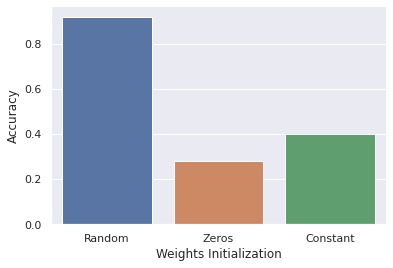

In [149]:
df_ = pd.DataFrame()
df_['Weights Initialization'] = ['Random','Zeros','Constant']
df_['Accuracy'] = [metrics.accuracy_score(y_test, ypredRandom),metrics.accuracy_score(y_test, ypredZero),metrics.accuracy_score(y_test, ypredConstant)]
sns.barplot(x = 'Weights Initialization', y = 'Accuracy', data = df_)

### Part e

In [150]:
model1 = neuralNetworks('random')
model1.add(16)
model1.add(16)
model1.addAct('sigmoid')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred2Layers = model1.predict(X_test)
model1 = neuralNetworks('random')
model1.add(16)
model1.add(32)
model1.addAct('sigmoid')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred1Layers = model1.predict(X_test)
model1 = neuralNetworks('random')
model1.add(16)
model1.add(64)
model1.addAct('sigmoid')
model1.add(7)
model1.compile()
model1.train(X_train,ytrain,500)
ypred0Layers = model1.predict(X_test)

Progress ---


100%|██████████| 8512/8512 [00:41<00:00, 202.92it/s]


Progress ---


100%|██████████| 8512/8512 [00:47<00:00, 178.61it/s]


Progress ---


100%|██████████| 8512/8512 [00:52<00:00, 163.16it/s]


In [151]:
metrics.accuracy_score(y_test, ypred2Layers)

0.8889802631578947

In [152]:
metrics.accuracy_score(y_test, ypred1Layers)

0.8933662280701754

In [153]:
metrics.accuracy_score(y_test, ypred0Layers)

0.9095394736842105

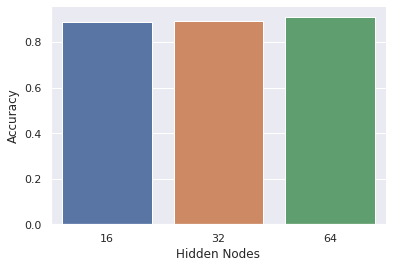

In [154]:
df_ = pd.DataFrame()
df_['Hidden Nodes'] = [16,32,64]
df_['Accuracy'] = [metrics.accuracy_score(y_test, ypred2Layers),metrics.accuracy_score(y_test, ypred1Layers),metrics.accuracy_score(y_test, ypred0Layers)]
sns.barplot(x = 'Hidden Nodes', y = 'Accuracy', data = df_)

# Question 1

## Data Preprocessing and Visualisation

In [197]:
df = pd.read_csv('/content/abalone.data')

In [198]:
df.columns = ['Column_'+str(i+1) for i in range(8)]+['Class']

In [199]:
df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Class
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [200]:
df.loc[df['Column_1'] == 'M','Column_1'] = 0
df.loc[df['Column_1'] == 'F','Column_1'] = 1
df.loc[df['Column_1'] == 'I','Column_1'] = 2

In [201]:
df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Class
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


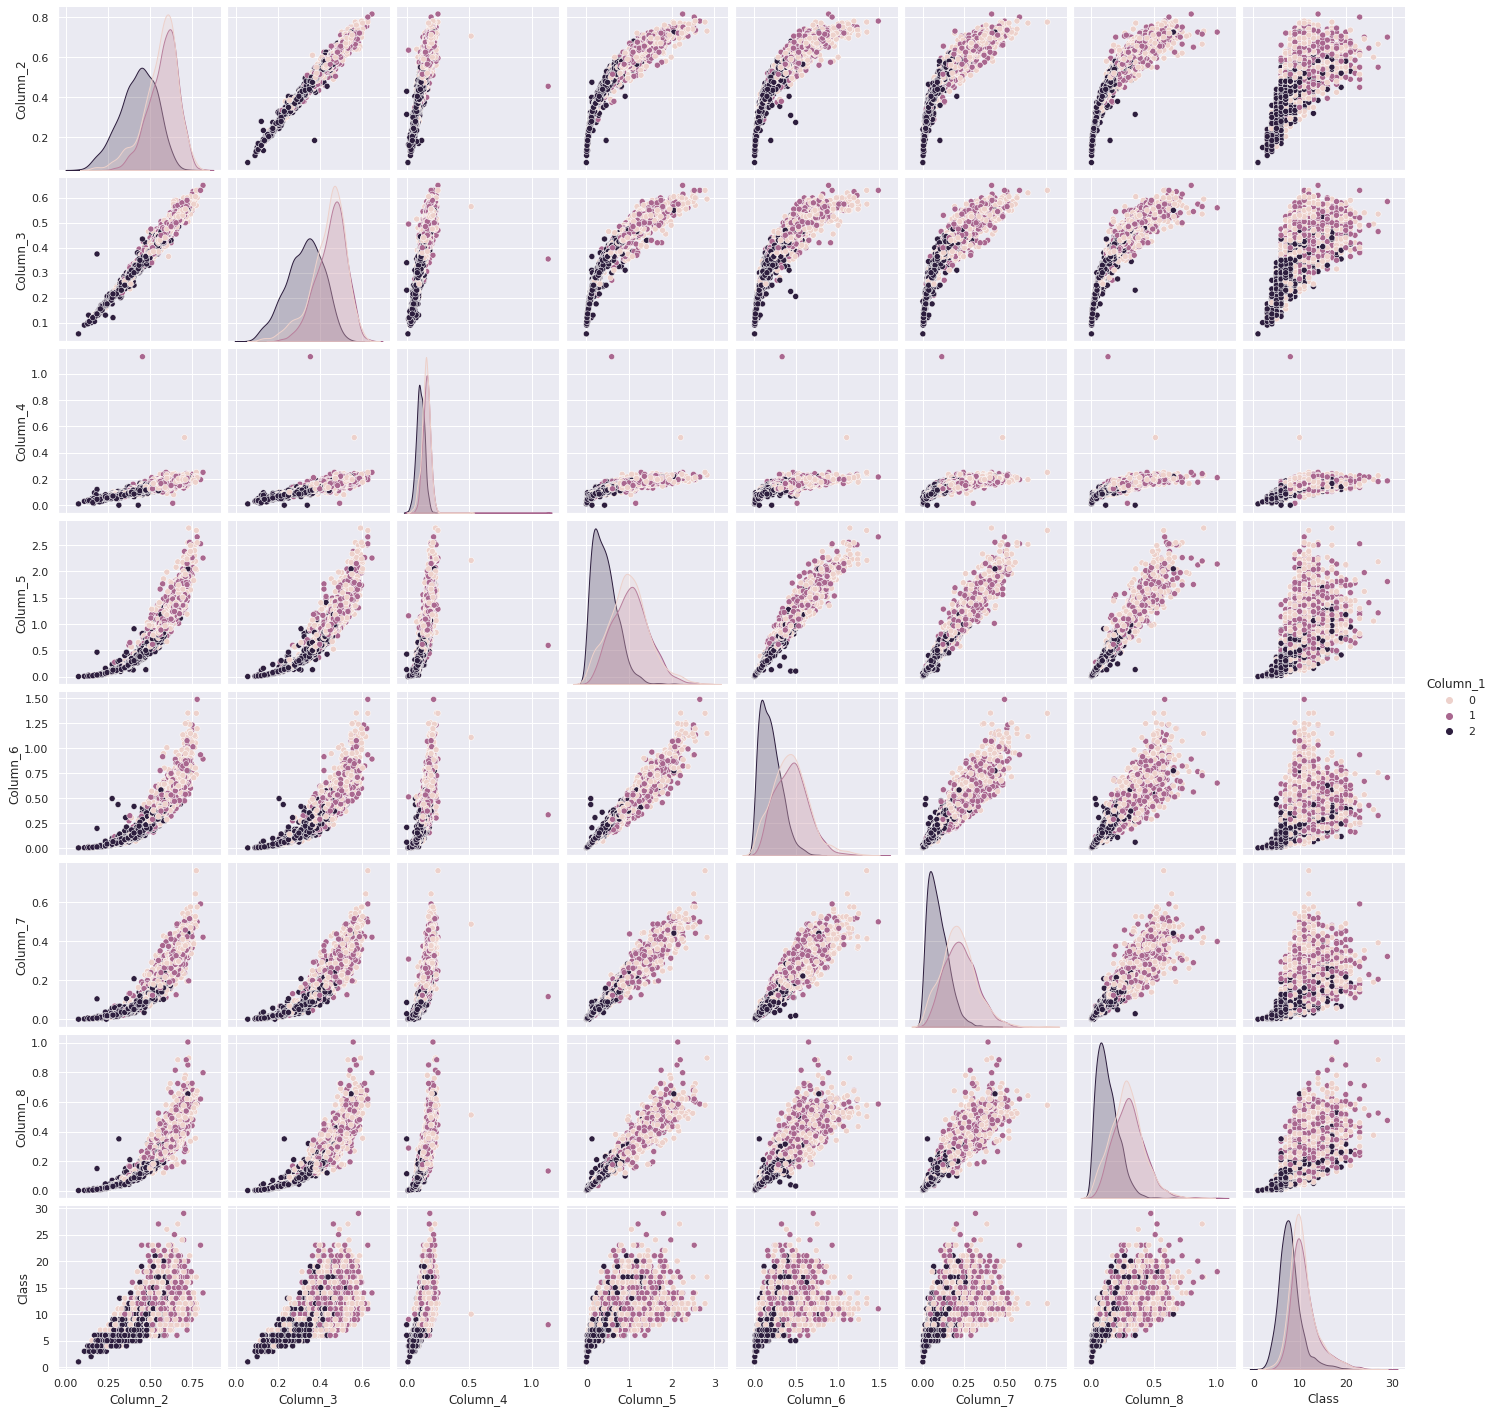

In [202]:
sns.pairplot(df, hue = 'Column_1')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column_1  4176 non-null   object 
 1   Column_2  4176 non-null   float64
 2   Column_3  4176 non-null   float64
 3   Column_4  4176 non-null   float64
 4   Column_5  4176 non-null   float64
 5   Column_6  4176 non-null   float64
 6   Column_7  4176 non-null   float64
 7   Column_8  4176 non-null   float64
 8   Class     4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [160]:
df.describe()

,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Class
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000,4176.000000
mean,0.955699,0.955699,0.955699,0.955699,0.955699,0.955699,0.955699,0.955699
std,0.827782,0.827782,0.827782,0.827782,0.827782,0.827782,0.827782,0.827782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [161]:
df.iloc[:,1:-1] = preprocessing.StandardScaler().fit_transform(df.iloc[:,1:-1])

In [166]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(X,y,train_size = 0.7,random_state=12)
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values 

In [167]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [168]:
batch_size = 32 #sample batch
num_epochs = 500 #number of times dataset is seen by model
learning_rate = 0.01
size_hidden_1 = 8 #neurons
size_hidden_2 = 8 #neurons
num_classes = 30 
batch_no = len(X_train) // batch_size  #batches
cols = X_train.shape[1] #Number of columns in input matrix

In [169]:
class NN(nn.Module):
  def __init__(self,num_inputs,size_hidden_1,size_hidden_2,output):
    super(NN,self).__init__()
    self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)
    self.activation_1 = torch.nn.Tanh()
    self.hidden_layer_2 = torch.nn.Linear(size_hidden_1,size_hidden_2)
    self.activation_2 = torch.nn.Tanh()

    self.output_layer = torch.nn.Linear(size_hidden_2, output) 
    self.output_activation = torch.nn.Softmax(dim = 1)

  def forward(self,x):
    x1 = self.activation_1(self.hidden_layer_1(x))  
    y1 = self.activation_2(self.hidden_layer_2(x)) 
    o = self.output_activation(self.output_layer(x1 + y1)) 
    return o

net = NN(cols, size_hidden_1, size_hidden_2, num_classes)
summary(net, (1, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              72
              Tanh-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 8]              72
              Tanh-4                 [-1, 1, 8]               0
            Linear-5                [-1, 1, 30]             270
           Softmax-6                [-1, 1, 30]               0
Total params: 414
Trainable params: 414
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [170]:
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
loss_func = torch.nn.CrossEntropyLoss()  

In [171]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [172]:
def get_accuracy(logit,target,batch_size):
  corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
  accuracy = 100.0 * corrects/batch_size
  return accuracy.item()

In [173]:
for epoch in range(num_epochs):
      #Shuffle just mixes up the dataset between epocs
    X_train, y_train = shuffle(X_train, y_train)

    train_acc = 0.0
    test_acc = 0
    running_loss = 0.0

    # Mini batch learning
    for i in range(batch_no):
        start = i * batch_size
        end = start + batch_size
        inputs = Variable(torch.FloatTensor(X_train[start:end]))
        labels = Variable(torch.LongTensor(y_train[start:end]))
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)

        #print("outputs",outputs,outputs.shape,"labels",labels, labels.shape)
        #loss = criterion(outputs, torch.unsqueeze(labels, dim=1))
        loss = loss_func(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        acc = get_accuracy(outputs, labels, batch_size)
        train_acc += acc

        inputst = Variable(torch.FloatTensor(X_test[start:end]))
        labelst = Variable(torch.LongTensor(y_test[start:end]))
        outputst = net(inputst)
        acct = get_accuracy(outputst, labelst, batch_size)
        test_acc += acct
      
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f | Test Accuracy : %.2f' \
          %(epoch+1, running_loss / (i+1), train_acc/(i+1), test_acc/(i+1)))  
    running_loss = 0.0

Epoch: 1 | Loss: 3.3974 | Train Accuracy: 29.53 | Test Accuracy : 10.75
Epoch: 2 | Loss: 3.3951 | Train Accuracy: 32.31 | Test Accuracy : 12.47
Epoch: 3 | Loss: 3.3924 | Train Accuracy: 32.38 | Test Accuracy : 12.47
Epoch: 4 | Loss: 3.3893 | Train Accuracy: 32.42 | Test Accuracy : 12.47
Epoch: 5 | Loss: 3.3858 | Train Accuracy: 32.35 | Test Accuracy : 12.47
Epoch: 6 | Loss: 3.3816 | Train Accuracy: 32.14 | Test Accuracy : 12.47
Epoch: 7 | Loss: 3.3763 | Train Accuracy: 32.35 | Test Accuracy : 12.47
Epoch: 8 | Loss: 3.3694 | Train Accuracy: 32.28 | Test Accuracy : 12.47
Epoch: 9 | Loss: 3.3597 | Train Accuracy: 32.28 | Test Accuracy : 12.47
Epoch: 10 | Loss: 3.3440 | Train Accuracy: 48.94 | Test Accuracy : 12.47
Epoch: 11 | Loss: 3.3126 | Train Accuracy: 46.88 | Test Accuracy : 27.13
Epoch: 12 | Loss: 3.2385 | Train Accuracy: 31.28 | Test Accuracy : 14.66
Epoch: 13 | Loss: 3.1494 | Train Accuracy: 31.28 | Test Accuracy : 14.66
Epoch: 14 | Loss: 3.1089 | Train Accuracy: 31.32 | Test Accu

In [174]:
## Model was no longer learning anything after 50th Epoch and overfitted.